# Sampling demo

In [1]:
import logging
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from numpy import arange

In [2]:
from pNeuma_simulator import params
from pNeuma_simulator.initialization import PoissonDisc

In [3]:
warnings.filterwarnings("ignore")
rcParams["animation.embed_limit"] = 2**128
rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": "Helvetica",
        "mathtext.fontset": "stixsans",
        "mathtext.default": "regular",
        "font.size": 7,
        "axes.titlesize": 7,
        "xtick.labelsize": 6,
        "ytick.labelsize": 6,
        "axes.linewidth": 0.25,
        "xtick.major.width": 0.25,
        "ytick.major.width": 0.25,
        "xtick.minor.width": 0.25,
        "ytick.minor.width": 0.25,
    }
)
logging.getLogger("matplotlib.font_manager").disabled = True

## Poisson disc sampling

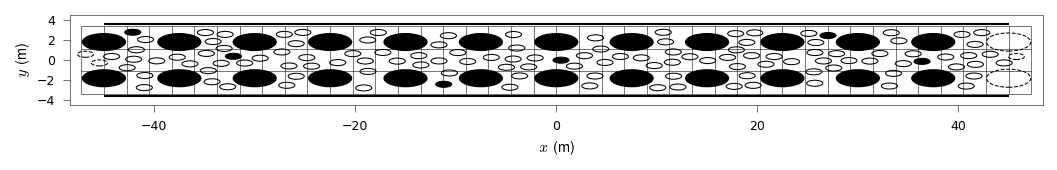

In [4]:
# Pseudorandom number generator
seed = 1024
rng = np.random.default_rng(seed)
n_cars = 12  # 14
n_moto = 6  # 12
# k = params.k
k = 128
sampler = PoissonDisc(
    n_cars, n_moto, cell=params.cell, L=params.L, W=params.cell * 3, k=k, clearance=params.clearance, rng=rng
)
samples, images = sampler.sample(rng)
c_samples = samples[: 2 * n_cars]
m_samples = samples[2 * n_cars :]
markings = arange(-sampler.W / 2, 3 * sampler.W / 4, sampler.W / 2)

fig, ax = plt.subplots(figsize=(2 * 8.7 * params.cm, 2.5 * params.cm), dpi=150)
ax.set_aspect("equal")
for sample in samples:
    if sample in c_samples:
        sample.styles = {"ec": "none", "fc": "k", "fill": True, "lw": 0.6}
    else:
        sample.styles = {"ec": "k", "fill": False, "lw": 0.5}
    sample.draw(ax)
for image in images:
    image.styles = {"ec": "k", "fill": False, "lw": 0.5, "ls": "--"}
    image.draw(ax)
for m_sample in rng.choice(m_samples, n_moto, replace=False):
    m_sample.styles = {"ec": "none", "fc": "k", "fill": True, "lw": 0.5}
    m_sample.draw(ax)
ax.hlines(
    [-params.lane, params.lane],
    xmin=-sampler.width / 2,
    xmax=sampler.width / 2,
    color="k",
    ls="-",
    lw=1,
)
ax.vlines(
    sampler.x_boundaries,
    ymin=-3 * sampler.cell / 2,
    ymax=3 * sampler.cell / 2,
    color="k",
    lw=0.25,
)
ax.hlines(
    sampler.y_boundaries,
    xmin=-sampler.nx * sampler.cell / 2,
    xmax=sampler.nx * sampler.cell / 2,
    color="k",
    lw=0.25,
)
plt.xlim(-(sampler.nx + 1) * sampler.cell / 2, (sampler.nx + 1) * sampler.cell / 2)
plt.ylim(-2 * sampler.cell, 2 * sampler.cell)
ax.set_xlabel("$x$ (m)", usetex=True)
ax.set_ylabel("$y$ (m)", usetex=True)
ax.set_yticks(arange(-4, 5, 2))
fig.tight_layout(pad=0)
# if n_moto == 0:
#    plt.savefig(f"darts_c{n_cars}m{n_moto}.pdf", format="pdf", transparent=True)
# else:
#    plt.savefig(f"darts_c{n_cars}m{n_moto}k{k}.pdf", format="pdf", transparent=True)

In [5]:
samples[0].encode(0)

{'theta': 0.0,
 'speed': 0.0,
 'a0': 0,
 'ttc': None,
 'tau': None,
 'lam': None,
 'v0': None,
 's0': None,
 'pos': array([-45. ,  -1.8]),
 'vel': array([0., 0.])}

In [6]:
samples[0].encode(1)

{'theta': 0.0,
 'speed': 0.0,
 'a0': 0,
 'ttc': None,
 'pos': array([-45. ,  -1.8]),
 'vel': array([0., 0.])}